# Airline Network in Europoe

   * What are the most important Airlines in the region?
   * What are the most important airport (hubs) of europe?
   * How one of the important airline interact with the other counties in the region?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Importing Airlines, Airports and routes

In [2]:
list_edges = ['LayerID','Source', 'Target', 'Weight']
airline = pd.read_csv('EUAir_Multiplex_Transport/EUAirTransportation_layers.txt', sep=' ')
airport = pd.read_csv('EUAir_Multiplex_Transport/EUAirTransportation_nodes.txt', sep=' ')
edges = pd.read_csv('EUAir_Multiplex_Transport/EUAirTransportation_multiplex.txt', sep=' ', names=list_edges)

In [3]:
airline.to_csv('Layers.csv', sep=';', index=False)
airport.to_csv('Nodes.csv', sep=';',index=False)
edges.to_csv('edges.csv', sep=';',index=False)

In [4]:
airline.head()

nodeID         nodeLabel
0       1         Lufthansa
1       2           Ryanair
2       3           Easyjet
3       4   British_Airways
4       5  Turkish_Airlines

In [5]:
airport.head()

nodeID nodeLabel   nodeLong    nodeLat
0       1      LCLK  33.630278  34.878890
1       2      EDDF   8.570555  50.033333
2       3      EDDK   7.142779  50.865833
3       4      EGNX  -1.328055  52.831112
4       5      EGTE  -3.413888  50.734444

In [6]:
edges

LayerID  Source  Target  Weight
0           1       1       2     1.0
1           1       1      38     1.0
2           1       2       7     1.0
3           1       2       8     1.0
4           1       2      10     1.0
...       ...     ...     ...     ...
3583       37      65      88     1.0
3584       37      65      93     1.0
3585       37      72      85     1.0
3586       37      85     248     1.0
3587       37     248     249     1.0

[3588 rows x 4 columns]

 # Generating a new dataset which will contain all the files imported
 
 Renaming the columns, so we can understand their meaning 

In [7]:
wholeds = edges
wholeds = wholeds.merge(airline, left_on='LayerID', right_on="nodeID", left_index=True).drop('nodeID',axis=1)
wholeds = wholeds.rename(columns={'nodeLabel':'Airline'})
wholeds

LayerID  Source  Target  Weight      Airline
0         1       1       2     1.0    Lufthansa
0         1       1      38     1.0    Lufthansa
0         1       2       7     1.0    Lufthansa
0         1       2       8     1.0    Lufthansa
0         1       2      10     1.0    Lufthansa
..      ...     ...     ...     ...          ...
36       37      65      88     1.0  Olympic_Air
36       37      65      93     1.0  Olympic_Air
36       37      72      85     1.0  Olympic_Air
36       37      85     248     1.0  Olympic_Air
36       37     248     249     1.0  Olympic_Air

[3588 rows x 5 columns]

In [8]:
wholeds = wholeds.merge(airport, left_on='Source', right_on="nodeID", left_index=True).drop('nodeID',axis=1)
wholeds = wholeds.rename(columns={'nodeLabel':'SourcePort','nodeLong':'SourceLong', 'nodeLat':'SourceLat'})
wholeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 0 to 247
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LayerID     3588 non-null   int64  
 1   Source      3588 non-null   int64  
 2   Target      3588 non-null   int64  
 3   Weight      3588 non-null   float64
 4   Airline     3588 non-null   object 
 5   SourcePort  3588 non-null   object 
 6   SourceLong  3588 non-null   float64
 7   SourceLat   3588 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 224.2+ KB


In [9]:
wholeds = wholeds.merge(airport, left_on='Target', right_on="nodeID", left_index=True).drop('nodeID',axis=1)
wholeds = wholeds.rename(columns={'nodeLabel':'TargetPort','nodeLong':'TargetLong', 'nodeLat':'TargetLat'})
wholeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 1 to 248
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LayerID     3588 non-null   int64  
 1   Source      3588 non-null   int64  
 2   Target      3588 non-null   int64  
 3   Weight      3588 non-null   float64
 4   Airline     3588 non-null   object 
 5   SourcePort  3588 non-null   object 
 6   SourceLong  3588 non-null   float64
 7   SourceLat   3588 non-null   float64
 8   TargetPort  3588 non-null   object 
 9   TargetLong  3588 non-null   float64
 10  TargetLat   3588 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 294.3+ KB


We use this file to decode Airports and Cities

In [10]:
airportsnames = pd.read_csv('EUAir_Multiplex_Transport/airports.dat', header=None, dtype=str)
airportsnames.columns = ["id", "name", "city", "country", "code", "icao", "latitude", "longitude", "altitude", "offset", "dst", "timezone", "type", "nametype"]
airportsnames= airportsnames[["name", "city","icao", "country"]]
airportsnames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     7698 non-null   object
 1   city     7649 non-null   object
 2   icao     7698 non-null   object
 3   country  7698 non-null   object
dtypes: object(4)
memory usage: 120.3+ KB


Adding names of source and target airports and cities

In [11]:
# adding source name and city to the dataframe
wholeds = wholeds.merge(airportsnames, left_on='SourcePort', right_on="icao", left_index=True).drop('icao',axis=1)
wholeds = wholeds.rename(columns={'name':'SourceName','city':'SourceCity', 'country':'SourceCountry'})
wholeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3587 entries, 1166 to 1423
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LayerID        3587 non-null   int64  
 1   Source         3587 non-null   int64  
 2   Target         3587 non-null   int64  
 3   Weight         3587 non-null   float64
 4   Airline        3587 non-null   object 
 5   SourcePort     3587 non-null   object 
 6   SourceLong     3587 non-null   float64
 7   SourceLat      3587 non-null   float64
 8   TargetPort     3587 non-null   object 
 9   TargetLong     3587 non-null   float64
 10  TargetLat      3587 non-null   float64
 11  SourceName     3587 non-null   object 
 12  SourceCity     3587 non-null   object 
 13  SourceCountry  3587 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 336.3+ KB


In [12]:
# adding target name and city to the dataframe
wholeds = wholeds.merge(airportsnames, left_on='TargetPort', right_on="icao", left_index=True).drop('icao',axis=1)
wholeds = wholeds.rename(columns={'name':'TargetName','city':'TargetCity','country':'TargetCountry'})
wholeds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3580 entries, 336 to 1425
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LayerID        3580 non-null   int64  
 1   Source         3580 non-null   int64  
 2   Target         3580 non-null   int64  
 3   Weight         3580 non-null   float64
 4   Airline        3580 non-null   object 
 5   SourcePort     3580 non-null   object 
 6   SourceLong     3580 non-null   float64
 7   SourceLat      3580 non-null   float64
 8   TargetPort     3580 non-null   object 
 9   TargetLong     3580 non-null   float64
 10  TargetLat      3580 non-null   float64
 11  SourceName     3580 non-null   object 
 12  SourceCity     3580 non-null   object 
 13  SourceCountry  3580 non-null   object 
 14  TargetName     3580 non-null   object 
 15  TargetCity     3580 non-null   object 
 16  TargetCountry  3580 non-null   object 
dtypes: float64(5), int64(3), object(9)
memory usage: 3

In [13]:
#Export for later use
wholeds.to_csv("processedAirlineDataset.csv")
wholeds.head(2)

LayerID  Source  Target  Weight    Airline SourcePort  SourceLong  \
336        1       1       2     1.0  Lufthansa       LCLK   33.630278   
342        1       1      38     1.0  Lufthansa       LCLK   33.630278   

     SourceLat TargetPort  TargetLong  TargetLat  \
336   34.87889       EDDF    8.570555  50.033333   
342   34.87889       EDDM   11.786111  48.353890   

                        SourceName SourceCity SourceCountry  \
336  Larnaca International Airport    Larnaca        Cyprus   
342  Larnaca International Airport    Larnaca        Cyprus   

                    TargetName TargetCity TargetCountry  
336  Frankfurt am Main Airport  Frankfurt       Germany  
342             Munich Airport     Munich       Germany

In [14]:
wholeds.groupby('LayerID').count().sort_values(by=['Source'],ascending=False)

Source  Target  Weight  Airline  SourcePort  SourceLong  SourceLat  \
LayerID                                                                       
2           601     601     601      601         601         601        601   
3           307     307     307      307         307         307        307   
1           244     244     244      244         244         244        244   
6           184     184     184      184         184         184        184   
26          180     180     180      180         180         180        180   
5           118     118     118      118         118         118        118   
8           110     110     110      110         110         110        110   
15           99      99      99       99          99          99         99   
10           93      93      93       93          93          93         93   
16           92      92      92       92          92          92         92   
13           87      87      87       87          87          87         87   
35           87      87      87       87          87          87         87   
32           73      73      73       73          73          73         73   
14           71      71      71       71          71          71         71   
7            69      69      69       69          69          69         69   
22           68      68      68       68          68          68         68   
29           67      67      67       67          67          67         67   
24           66      66      66       66          66          66         66   
4            66      66      66       66          66          66         66   
21           63      63      63       63          63          63         63   
9            62      62      62       62          62          62         62   
36           61      61      61       61          61          61         61   
11           60      60      60       60          60          60         60   
23           58      58      58       58          58          58         58   
25           58      58      58       58          58          58         58   
20           55      55      55       55          55          55         55   
27           55      55      55       55          55          55         55   
17           53      53      53       53          53          53         53   
30           53      53      53       53          53          53         53   
34           45      45      45       45          45          45         45   
37           43      43      43       43          43          43         43   
18           43      43      43       43          43          43         43   
19           42      42      42       42          42          42         42   
31           41      41      41       41          41          41         41   
28           37      37      37       37          37          37         37   
12           35      35      35       35          35          35         35   
33           34      34      34       34          34          34         34   

         TargetPort  TargetLong  TargetLat  SourceName  SourceCity  \
LayerID                                                              
2               601         601        601         601         601   
3               307         307        307         307         307   
1               244         244        244         244         244   
6               184         184        184         184         184   
26              180         180        180         180         180   
5               118         118        118         118         118   
8               110         110        110         110         110   
15               99          99         99          99          99   
10               93          93         93          93          93   
16               92          92         92          92          92   
13               87          87         87          87          87   
35               

# Most important airlines

In [15]:
# Sort Airlines by number of routes
sortedairline = wholeds.groupby('Airline').count().sort_values('LayerID', ascending=False).sort_values('Source', ascending=False)
sortedairline.head(2)

LayerID  Source  Target  Weight  SourcePort  SourceLong  SourceLat  \
Airline                                                                       
Ryanair      601     601     601     601         601         601        601   
Easyjet      307     307     307     307         307         307        307   

         TargetPort  TargetLong  TargetLat  SourceName  SourceCity  \
Airline                                                              
Ryanair         601         601        601         601         601   
Easyjet         307         307        307         307         307   

         SourceCountry  TargetName  TargetCity  TargetCountry  
Airline                                                        
Ryanair            601         601         601            601  
Easyjet            307         307         307            307

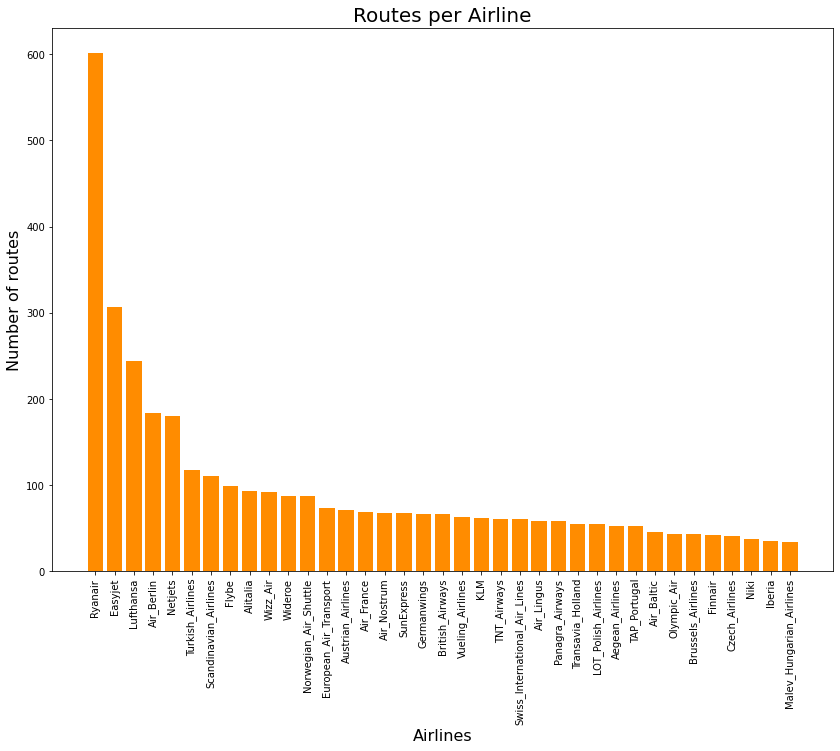

In [16]:
# Bar plot routes per Airline 
plt.figure(figsize=(14,10))
_ = plt.bar(sortedairline.index,sortedairline.Source, color='darkorange', lw=2 )

_=plt.xticks(rotation='vertical')
_=plt.xlabel('Airlines',fontsize=16)
_=plt.ylabel('Number of routes', fontsize=16)
_=plt.title('Routes per Airline', fontsize=20)
plt.show()


# Route per airport

In [17]:
airsource = wholeds.groupby('Source').count()
airsource.head()

LayerID  Target  Weight  Airline  SourcePort  SourceLong  SourceLat  \
Source                                                                        
1            16      16      16       16          16          16         16   
2           126     126     126      126         126         126        126   
3            70      70      70       70          70          70         70   
4            32      32      32       32          32          32         32   
5            11      11      11       11          11          11         11   

        TargetPort  TargetLong  TargetLat  SourceName  SourceCity  \
Source                                                              
1               16          16         16          16          16   
2              126         126        126         126         126   
3               70          70         70          70          70   
4               32          32         32          32          32   
5               11          11         11          11          11   

        SourceCountry  TargetName  TargetCity  TargetCountry  
Source                                                        
1                  16          16          16             16  
2                 126         126         126            126  
3                  70          70          70             70  
4                  32          32          32             32  
5                  11          11          11             11

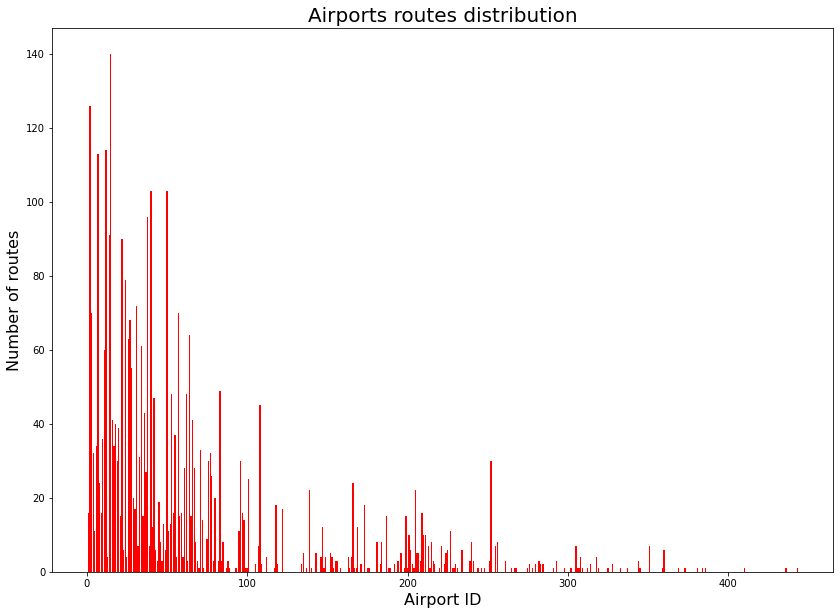

In [18]:
# First bar plot, without sorting ( Not for the presentation)
plt.figure(figsize=(14,10))
_ = plt.bar(airsource.index,airsource.LayerID, color='r', )


_=plt.xlabel('Airport ID',fontsize=16)
_=plt.ylabel('Number of routes', fontsize=16)
_=plt.title('Airports routes distribution', fontsize=20)
plt.show()

In [ ]:
#Retreiving source airport
traffic = wholeds.groupby("Source")
countonports = {}
for k,v in traffic.groups.items():
       countonports[k] = len(traffic.groups[k])

In [20]:
#Retreiving target aiport
traffic2 = wholeds.groupby("Target")
countonports2 = {}
for k,v in traffic2.groups.items():
       countonports2[k] = len(traffic2.groups[k])

In [21]:
#Merging both to create a pandas dataframe
trafficports={}
for k in range(1,451): # there are 450 airports
    trafficports[k] =0
    if k in countonports:
        trafficports[k] += countonports[k]
    if k in countonports2: 
        trafficports[k] += countonports2[k]
trafficports = pd.DataFrame({"NodeID":trafficports.keys(),"NbRoutes":trafficports.values()})
trafficports

NodeID  NbRoutes
0         1        16
1         2       127
2         3        70
3         4        32
4         5        11
..      ...       ...
445     446         0
446     447         2
447     448         1
448     449         1
449     450         1

[450 rows x 2 columns]

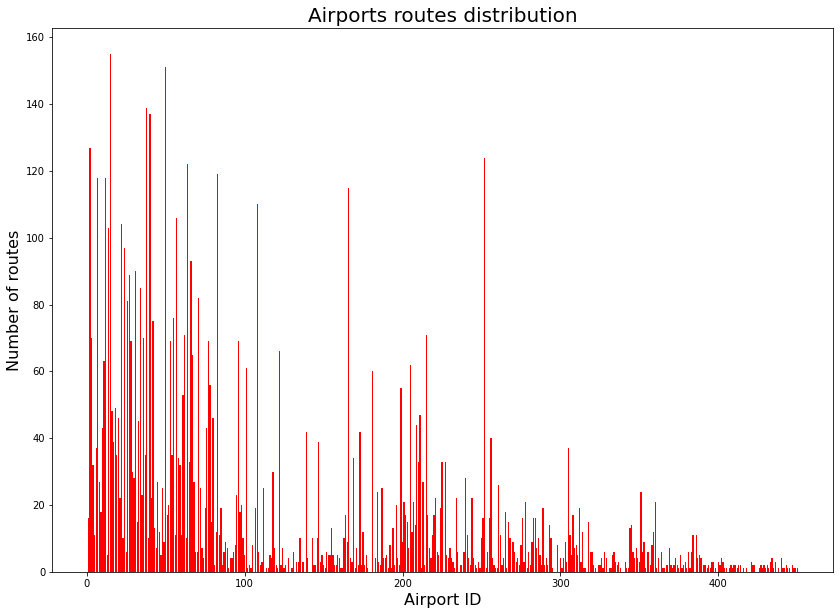

In [22]:
# bar plot, without sorting ( Not for the presentation)
plt.figure(figsize=(14,10))
_ = plt.bar(trafficports.NodeID,trafficports.NbRoutes, color='r', )

_=plt.xlabel('Airport ID',fontsize=16)
_=plt.ylabel('Number of routes', fontsize=16)
_=plt.title('Airports routes distribution', fontsize=20)
plt.show()

In [23]:
#Sorting Airports by number of routes
trafficports = trafficports.merge(wholeds[['Source','SourcePort']], left_on='NodeID', right_on="Source", left_index=True).drop('Source',axis=1)

sortedtraffports = trafficports.sort_values(by=['NbRoutes'])
sortedtraffports= sortedtraffports.drop_duplicates(subset=['NodeID'])


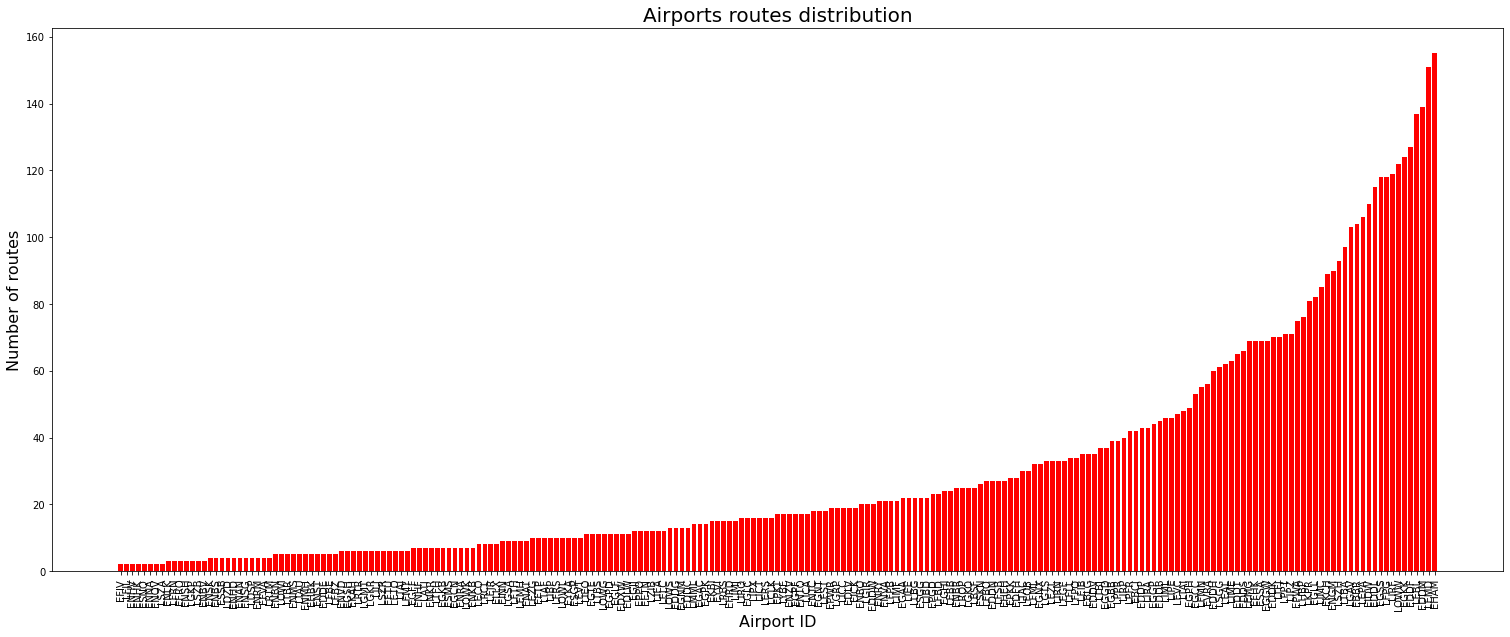

In [24]:
# Bar plot sorted airports by number of routes
plt.figure(figsize=(26,10))

_ = plt.bar(sortedtraffports.SourcePort, sortedtraffports.NbRoutes, color='r', )

_=plt.xticks(rotation='vertical')
_=plt.xlabel('Airport ID',fontsize=16)
_=plt.ylabel('Number of routes', fontsize=16)
_=plt.title('Airports routes distribution', fontsize=20)
plt.show()

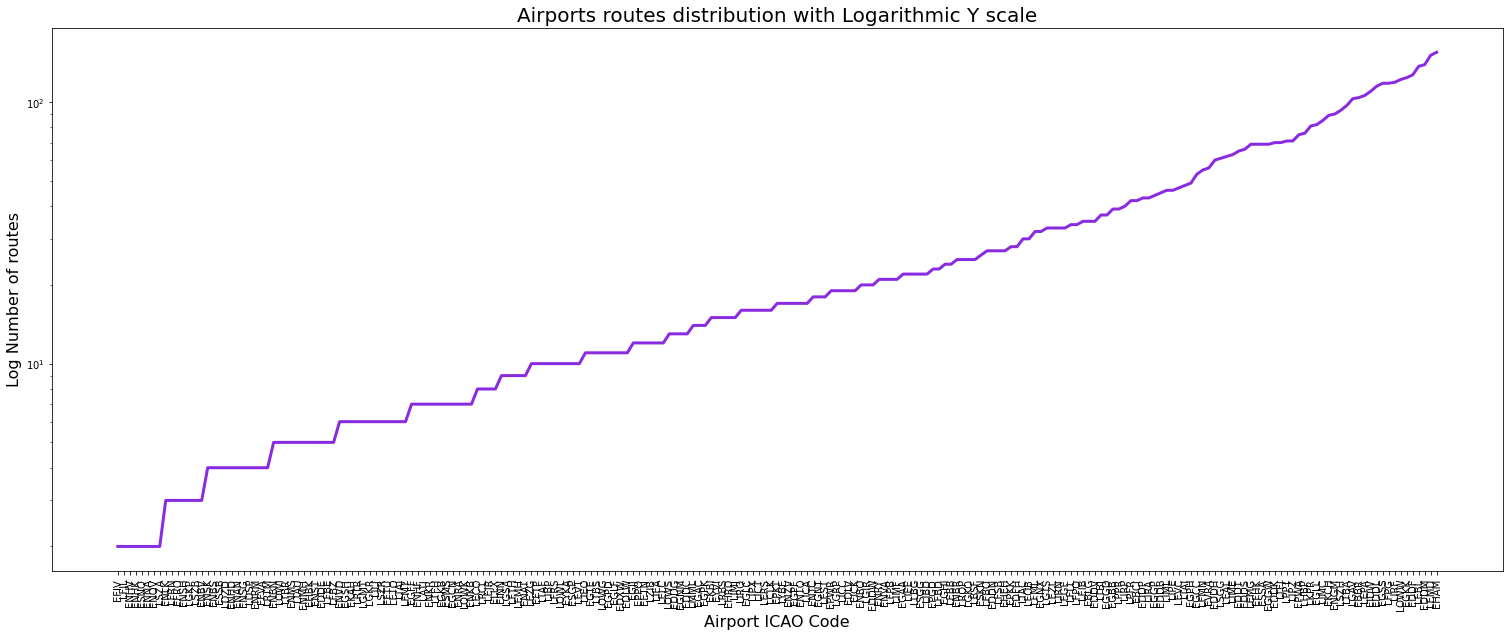

In [25]:
# Logarithmic Y Scale Bar plot sorted airports by number of routes
plt.figure(figsize=(26,10))

_ = plt.plot(sortedtraffports.SourcePort, sortedtraffports.NbRoutes, color='blueviolet', lw=3 )

_=plt.xticks(rotation='vertical')
_=plt.xlabel('Airport ICAO Code',fontsize=16)
_=plt.ylabel('Log Number of routes', fontsize=16)
_=plt.yscale('log')
_=plt.title('Airports routes distribution with Logarithmic Y scale', fontsize=20)
plt.show()

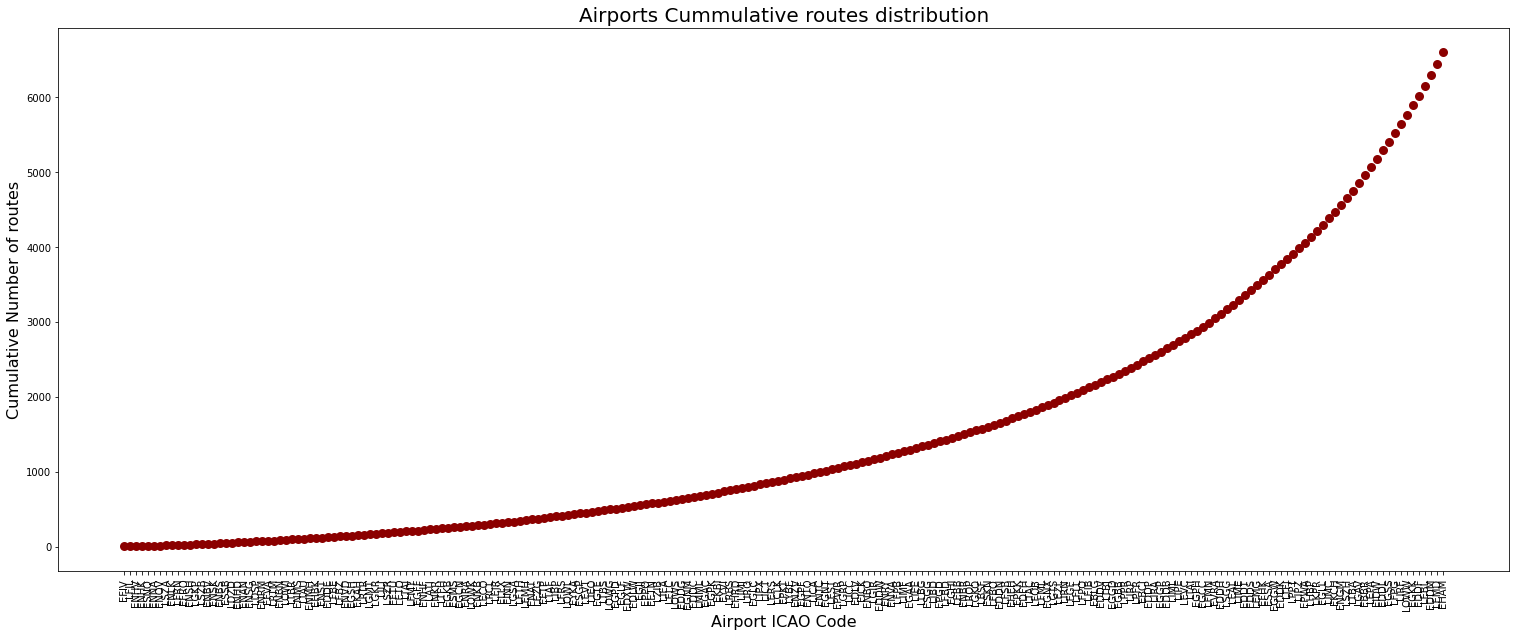

In [26]:
# Cummulative Bar plot sorted airports by number of routes
plt.figure(figsize=(26,10))

_ = plt.scatter(sortedtraffports.SourcePort, sortedtraffports.NbRoutes.cumsum(), color='darkred', lw=3 )

_=plt.xticks(rotation='vertical')
_=plt.xlabel('Airport ICAO Code',fontsize=16)
_=plt.ylabel('Cumulative Number of routes', fontsize=16)
# _=plt.yscale('log')
_=plt.title('Airports Cummulative routes distribution', fontsize=20)
plt.show()

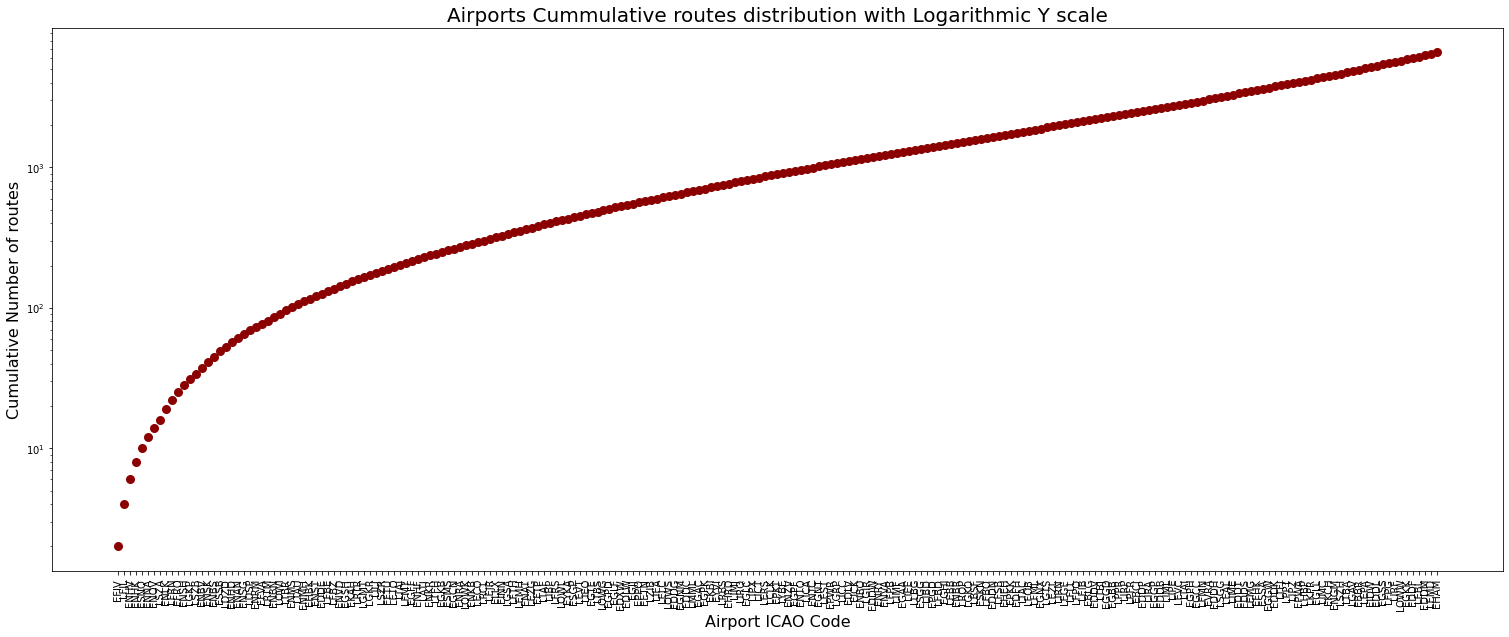

In [27]:
# Logarithmic Y Scale Cummulative Bar plot sorted airports by number of routes

plt.figure(figsize=(26,10))

_ = plt.scatter(sortedtraffports.SourcePort, sortedtraffports.NbRoutes.cumsum(), color='darkred', lw=3 )

_=plt.xticks(rotation='vertical')
_=plt.xlabel('Airport ICAO Code',fontsize=16)
_=plt.ylabel('Cumulative Number of routes', fontsize=16)
_=plt.yscale('log')
_=plt.title('Airports Cummulative routes distribution with Logarithmic Y scale', fontsize=20)
plt.show()

In [28]:
# Top 20 Airports by routes
sortedtraffports
top20 = sortedtraffports.tail(20).merge(wholeds[['Source','SourceCity']], left_on='NodeID', right_on="Source", left_index=True).drop('Source',axis=1)
top20= top20.drop_duplicates(subset=['SourceCity'])
top20.SourceCity

342               Milano
342           Copenhagen
342                 Oslo
497               Zurich
342             Istanbul
342               Athens
342             Brussels
497    Palma de Mallorca
497               Dublin
497          Duesseldorf
342               London
342                Paris
497                 Rome
497               Vienna
342            Frankfurt
497            Barcelona
497               Munich
497               Madrid
342            Amsterdam
Name: SourceCity, dtype: object

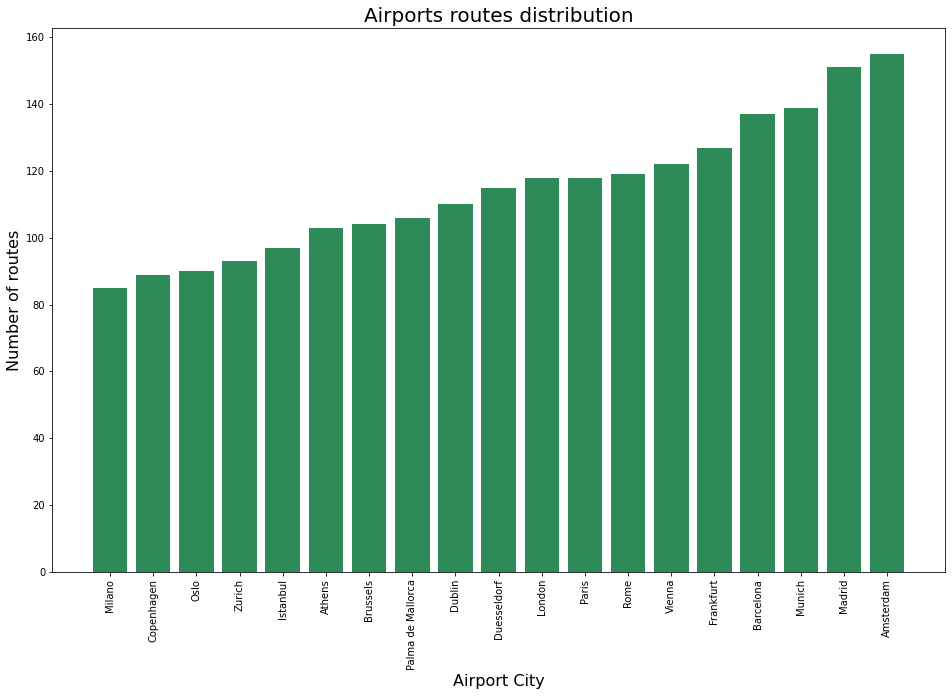

In [29]:
# Bar plot Top 20 Airports by routes
plt.figure(figsize=(16,10))

_ = plt.bar(top20.SourceCity, top20.NbRoutes, color='seagreen', )

_=plt.xticks(rotation='vertical')
_=plt.xlabel('Airport City',fontsize=16)
_=plt.ylabel('Number of routes', fontsize=16)
_=plt.title('Airports routes distribution', fontsize=20)
plt.show()

In [30]:
#Showing nodes of the dataset on the map
import folium
m = folium.Map(location=[48.86, 2.33],zoom_start=2 )
for i in range(0,len(wholeds)):
    lat = wholeds.iloc[i]['SourceLat']
    lon = wholeds.iloc[i]['SourceLong']
    name = wholeds.iloc[i]['SourcePort']
    folium.CircleMarker([lat, lon], color='red' , popup=name+'<br>Routes : ',
        fill_color='red').add_to(m)
m

In [31]:
# Create the network from our dataset 
g = nx.from_pandas_edgelist(wholeds, source='Source', target='Target')
len(g.nodes()), len(g.edges())

(412, 2945)

<Figure size 1008x720 with 0 Axes>

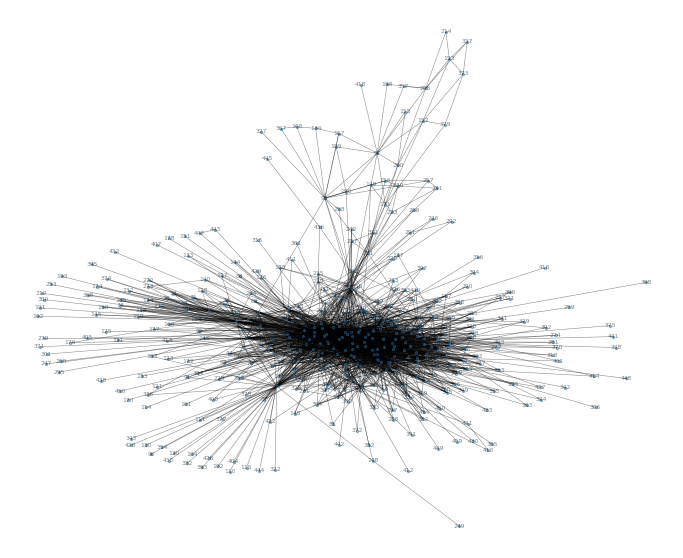

In [32]:
#Showing the network

plt.figure(figsize=(14,10))
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
nx.draw_networkx(g, arrows=True, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5, vmax=200)

ax.set_axis_off()

In [33]:
# Creating a dataframe for Nodes and degrees of the network
nodesdegree = pd.DataFrame(dict(g.degree()).items(), columns=['NodeID','Degree'])
nodesdegree = nodesdegree.sort_values('Degree', ascending=False)
nodesdegree.describe()

NodeID      Degree
count  412.000000  412.000000
mean   219.599515   14.296117
std    129.722284   20.611803
min      1.000000    1.000000
25%    103.750000    2.000000
50%    218.500000    5.000000
75%    331.250000   17.000000
max    450.000000  112.000000

In [34]:
tokepler = wholeds.merge(nodesdegree, left_on='Source', right_on='NodeID',left_index=True).drop('NodeID', axis=1)

In [35]:
# Exporting dataset with a degree superior to the mean
tokepler = tokepler[tokepler.Degree > 75]
tokepler.to_csv('50nodesofgrey.csv')
tokepler.describe()

LayerID       Source       Target  Weight   SourceLong  \
count  1246.000000  1246.000000  1246.000000  1246.0  1246.000000   
mean     10.547352    40.017657   153.807384     1.0     5.976288   
std       9.421871    45.935730   105.826355     0.0     7.988926   
min       1.000000     2.000000     6.000000     1.0    -6.270000   
25%       2.000000    12.000000    62.000000     1.0     2.078333   
50%       7.000000    24.000000   123.500000     1.0     4.484445   
75%      18.000000    50.000000   228.000000     1.0     8.570555   
max      36.000000   252.000000   449.000000     1.0    28.814166   

         SourceLat   TargetLong    TargetLat       Degree  
count  1246.000000  1246.000000  1246.000000  1246.000000  
mean     47.373823     8.402377    46.678992    91.104334  
std       4.772487    10.914198     6.334660    10.772807  
min      39.551668   -25.697778    32.009444    76.000000  
25%      41.296944    -0.558055    41.296944    80.000000  
50%      49.009721     8.582221    46.238334    91.000000  
75%      51.280835    14.290834    51.498333   100.000000  
max      53.421387    43.330835    69.725000   112.000000

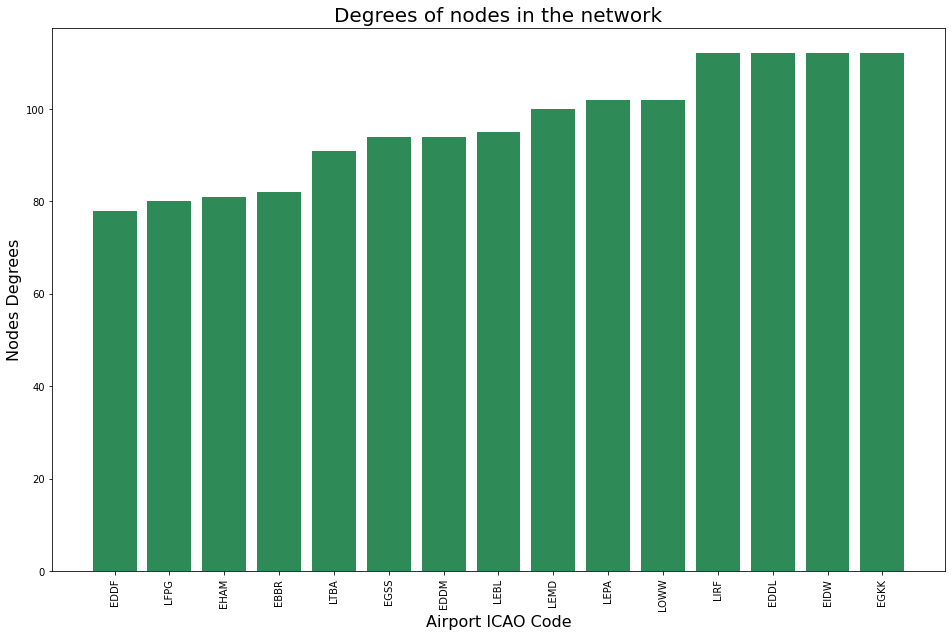

In [36]:
# Bar plot of the nodes with a degree superior to the mean
plt.figure(figsize=(16,10))

_ = plt.bar(tokepler.SourcePort, tokepler.Degree.sort_values(), color='seagreen')

_=plt.xticks(rotation='vertical')
_=plt.xlabel('Airport ICAO Code',fontsize=16)
_=plt.ylabel('Nodes Degrees', fontsize=16)
_=plt.title('Degrees of nodes in the network', fontsize=20)
plt.show()

# Relationship between Airline origin country and other countries

In [37]:
# selecting 3 airlines from the dataset (3 Airlines with most routes)
importantairline = wholeds[wholeds.Airline.isin(['Lufthansa','Ryanair','Easyjet'])]
importantairline.head(2)

LayerID  Source  Target  Weight    Airline SourcePort  SourceLong  \
336        1       1       2     1.0  Lufthansa       LCLK   33.630278   
342        1       1      38     1.0  Lufthansa       LCLK   33.630278   

     SourceLat TargetPort  TargetLong  TargetLat  \
336   34.87889       EDDF    8.570555  50.033333   
342   34.87889       EDDM   11.786111  48.353890   

                        SourceName SourceCity SourceCountry  \
336  Larnaca International Airport    Larnaca        Cyprus   
342  Larnaca International Airport    Larnaca        Cyprus   

                    TargetName TargetCity TargetCountry  
336  Frankfurt am Main Airport  Frankfurt       Germany  
342             Munich Airport     Munich       Germany

In [39]:
source = importantairline[['LayerID','Airline','SourceCountry']]
target = importantairline[['LayerID','Airline','TargetCountry']]

In [40]:
#Merging the dataframe source and destination
source.columns=["LayerID","Airline","Country"]
target.columns=["LayerID","Airline","Country"]
airlinescountry = source.append(target,ignore_index=True)

LayerID  Airline         Country
12          3  Easyjet  United Kingdom
24          3  Easyjet  United Kingdom
25          3  Easyjet          Cyprus
26          3  Easyjet         Germany
27          3  Easyjet          France
...       ...      ...             ...
2214        3  Easyjet           Spain
2215        3  Easyjet           Spain
2287        3  Easyjet        Portugal
2288        3  Easyjet        Portugal
2289        3  Easyjet       Gibraltar

[614 rows x 3 columns]

In [ ]:
#Creating a new column to map Airlines with their country of origin
airlinescountry['AirlineCountry'] = airlinescountry.LayerID.map({1:'Germany',2:'Ireland',3:'United Kingdom'})
airlinescountry.head(2)

In [ ]:
# Loading file with countries centers longitudes and latitudes
coords=pd.read_csv("gpscountry.csv",encoding="latin1")
coords.head(2)

In [ ]:
# Merging longitude and latitudes for Airlines
airlinescountry = airlinescountry.merge(coords, left_on='AirlineCountry', right_on="name", left_index=True).drop('name',axis=1)
airlinescountry = airlinescountry.rename(columns={'longitude':'SourceLong', 'latitude':'SourceLat'})

In [ ]:
# Merging longitude and latitudes for country destination
airlinescountry = airlinescountry.merge(coords, left_on='Country', right_on="name", left_index=True).drop('name',axis=1)
airlinescountry = airlinescountry.rename(columns={'longitude':'TargetLong', 'latitude':'TargetLat'})
airlinescountry.head(2)

In [ ]:
# exporting file to show on Keplet
airlinescountry.to_csv('Airlines_Country_Routes.csv')

In [ ]:

airlinescountry.groupby('LayerID')

In [ ]:
# Creating the network
CG = nx.from_pandas_edgelist(airlinescountry, source='Airline', target='Country')
len(CG.nodes()), len(CG.edges())

In [ ]:
# First network draw
plt.figure(figsize=(16,10))
nx.draw_networkx(CG)

In [ ]:
max(dict(CG.degree()).items(), key = lambda x : x[1])

In [ ]:
len(airlinescountry.groupby('Country').LayerID.count())

In [ ]:
# Nodes degrees
degree_dict = dict(CG.degree(CG.nodes()))
nx.set_node_attributes(CG, degree_dict, 'degree')
degree_dict

In [ ]:
# Removing nodes with degree 1
remove =[]
for k,v in degree_dict.items():
    if v < 2:
        remove.append(k)


In [ ]:
# Removing nodes with degree 1
for i in remove:
    CG.remove_node(i)

In [41]:
# Second draw of the network after removing nodes with degree 1
plt.figure(figsize=(16,10))
nx.draw_networkx(CG)

NameError: name 'CG' is not defined

<Figure size 1152x720 with 0 Axes>